In [1]:
import pandas as pd

In [3]:
from google.colab import files


uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
text_messages = pd.read_csv('spam.csv', encoding = 'ISO-8859-1', usecols = ['v1', 'v2'])

In [ ]:
text_messages

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Data cleaning and preprocessing**

In [18]:
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
text_messages['v2'] = text_messages['v2'].apply(preprocess_text)

**Creating the Bag of Words model**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(text_messages['v2']).toarray()

In [21]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
y = pd.get_dummies(text_messages['v1'])
y = y.iloc[:,1].values

In [23]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

**Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**Training model using Naive bayes classifier**

In [25]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model = MultinomialNB().fit(X_train, y_train)

**Prediction & Model Accuracy**

In [26]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = spam_detection_model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.9874439461883409
F1 Score: 0.9874439461883409


**Confusion Matrix**

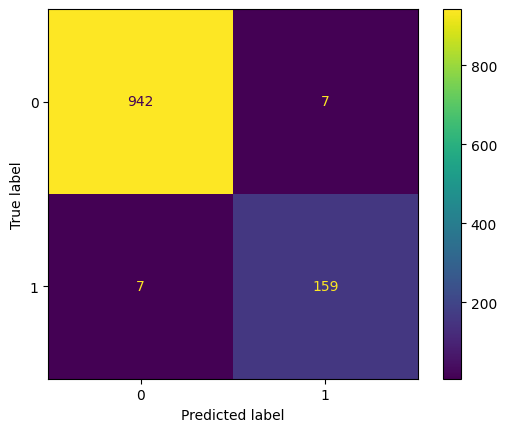

In [27]:
import matplotlib.pyplot as plt

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

**Predicting on custom message**

In [28]:
new_messages = ['Get a free cruise now!', 'Hey, can you pick up some milk on your way home?']
new_messages = [preprocess_text(msg) for msg in new_messages]
new_messages = cv.transform(new_messages)
predictions = spam_detection_model.predict(new_messages)
print('Predictions:', predictions)

Predictions: [1 0]
